# Team Members
Team Name - Team Seven
1. Reezwan Ul Haq Mohammad - rmoham27@uic.edu
2. Sai Anish Garapati - sgarap2@uic.edu
3. Vamsi Krishna Mandalapu - vmanda8@uic.edu

Project Name - Crash Prediction in Chicago

# Any Changes
Previously we wanted to build models around the usecase of predicting the fatality of the accident, but the number of accidents that involve serious fatalities are less. So we are building models around the usecase of predicting the 'Primary Reason for a Crash'

# Data
We are using 3 different datasets which are crashes dataset, vehicle dataset and people dataset. These datasets have the details of a crash occurred, vehicles involved in the crash and people invloved in the crash.
There are 700k rows with 49 columns of data in Crash Dataset.
Original size of vehicle dataset is 780 MB which has 1.5 million rows with 71 columns.
The people dataset contains information about people involved in a crash and if any injuries were sustained.
We are using the crash id which is contained in all the datasets to map them where if two or more vehicles are included in a crash, we pick the vehicle which is the reason for the crash.
Source

Crashes Dataset - https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if

Vehicle Dataset - https://data.cityofchicago.org/Transportation/Traffic-Crashes-Vehicles/68nd-jvt3

People Dataset - https://data.cityofchicago.org/Transportation/Traffic-Crashes-People/u6pd-qa9d


# Problem
The main idea of this project is to build predictive model that can tell us the primary reason for a crash given certain attributes which would help us to analyze the reasons that could lead to crash based on the primary crash reason. Understanding the possibility of a crash would help us to take preventive approaches to avoid them to a certain degree

# Research Question - Team Member 1
Q) What is the probability of a particular vehicle type to have a defect in its engine.
A) We can use Logistic regression model to answer the above question by taking vehicle defect as the independent variable in the

# Data Cleaning - Team Member 1
Initially there were 1.5 million rows in the vehicle dataset and 71 columns out of which a lot of columns were redundant and would not be useful to build our model. So we have removed those columns and only included whichever are useful.
We came up with 11 columns at the end which has decreased the data size from 780MB to 100MB. 
Rows containing null values in crash id and vehicle id are removed and remaining columns are filled with their mean or mode.
There were outliers in number of passengers and vehicle year which are eliminated.
The final vehicle dataset has 134123 rows which will be further reduced once it is joined with people dataset and the crash dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
path = os.path.join('C:' + os.sep, 'Users', 'NAYEEM AKHTER', 'Desktop', 'UIC', 'CS 418', 'Project', 'Traffic_Crashes-Vehicles.csv')
vehicle_data = pd.read_csv(path, low_memory=False)

In [3]:
vehicle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422540 entries, 0 to 1422539
Data columns (total 72 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   CRASH_UNIT_ID             1422540 non-null  int64  
 1   CRASH_RECORD_ID           1422540 non-null  object 
 2   RD_NO                     1414316 non-null  object 
 3   CRASH_DATE                1422540 non-null  object 
 4   UNIT_NO                   1422540 non-null  int64  
 5   UNIT_TYPE                 1420576 non-null  object 
 6   NUM_PASSENGERS            210509 non-null   float64
 7   VEHICLE_ID                1390358 non-null  float64
 8   CMRC_VEH_I                26584 non-null    object 
 9   MAKE                      1390353 non-null  object 
 10  MODEL                     1390209 non-null  object 
 11  LIC_PLATE_STATE           1263971 non-null  object 
 12  VEHICLE_YEAR              1164656 non-null  float64
 13  VEHICLE_DEFECT            1

In [4]:
v_data = vehicle_data.drop(vehicle_data.columns[[0, 2, 4, 8, 10, 14, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71]], axis=1)
v_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422540 entries, 0 to 1422539
Data columns (total 11 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   CRASH_RECORD_ID   1422540 non-null  object 
 1   CRASH_DATE        1422540 non-null  object 
 2   UNIT_TYPE         1420576 non-null  object 
 3   NUM_PASSENGERS    210509 non-null   float64
 4   VEHICLE_ID        1390358 non-null  float64
 5   MAKE              1390353 non-null  object 
 6   LIC_PLATE_STATE   1263971 non-null  object 
 7   VEHICLE_YEAR      1164656 non-null  float64
 8   VEHICLE_DEFECT    1390358 non-null  object 
 9   VEHICLE_USE       1390358 non-null  object 
 10  TRAVEL_DIRECTION  1390358 non-null  object 
dtypes: float64(3), object(8)
memory usage: 119.4+ MB


In [5]:
v_data.dropna(subset = ['CRASH_RECORD_ID', 'CRASH_DATE', 'VEHICLE_ID'],inplace = True)
v_data['UNIT_TYPE'].fillna(value = v_data['UNIT_TYPE'].mode()[0], inplace = True)
v_data['NUM_PASSENGERS'].fillna(value = v_data['NUM_PASSENGERS'].mean(), inplace = True)
v_data['MAKE'].fillna(value = v_data['MAKE'].mode()[0], inplace = True)
v_data['LIC_PLATE_STATE'].fillna(value = v_data['LIC_PLATE_STATE'].mode()[0], inplace = True)
v_data['VEHICLE_YEAR'].fillna(value = v_data['VEHICLE_YEAR'].mean(), inplace = True)
v_data['VEHICLE_DEFECT'].fillna(value = v_data['VEHICLE_DEFECT'].mode()[0], inplace = True)
v_data['VEHICLE_USE'].fillna(value = v_data['VEHICLE_USE'].mode()[0], inplace = True)
v_data['TRAVEL_DIRECTION'].fillna(value = v_data['TRAVEL_DIRECTION'].mode()[0], inplace = True)
v_data.head()

,CRASH_RECORD_ID,CRASH_DATE,UNIT_TYPE,NUM_PASSENGERS,VEHICLE_ID,MAKE,LIC_PLATE_STATE,VEHICLE_YEAR,VEHICLE_DEFECT,VEHICLE_USE,TRAVEL_DIRECTION
0,24ddf9fd8542199d832e1c223cc474e5601b356f1d77a6...,01/22/2020 06:25:00 AM,DRIVER,1.470555,796949.0,INFINITI,IL,2017.000000,NONE,PERSONAL,N
1,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,09/28/2019 03:30:00 AM,DRIVER,1.470555,834816.0,HONDA,IL,2016.000000,UNKNOWN,PERSONAL,N
2,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,09/28/2019 03:30:00 AM,PARKED,1.470555,834819.0,TOYOTA,IL,2010.000000,NONE,PERSONAL,N
3,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,09/28/2019 03:30:00 AM,PARKED,1.470555,834817.0,GENERAL MOTORS CORPORATION (GMC),IL,2008.000000,UNKNOWN,UNKNOWN/NA,N
4,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,04/13/2020 10:50:00 PM,DRIVER,1.470555,827212.0,BUICK,IL,2013.692788,NONE,PERSONAL,W


CRASH_RECORD_ID      object
CRASH_DATE           object
UNIT_TYPE            object
NUM_PASSENGERS        int32
VEHICLE_ID          float64
MAKE                 object
LIC_PLATE_STATE      object
VEHICLE_YEAR        float64
VEHICLE_DEFECT       object
VEHICLE_USE          object
TRAVEL_DIRECTION     object
dtype: object


(0.0, 10.0)

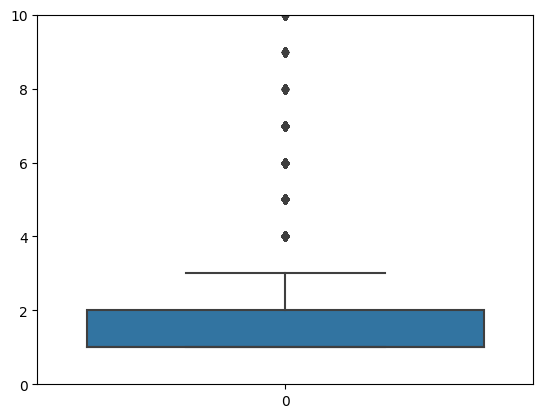

In [6]:
v_data = v_data.astype({'NUM_PASSENGERS':'int'})
print(v_data.dtypes)
a = sns.boxplot(vehicle_data['NUM_PASSENGERS'])
a.set_ylim(0,10)

336


<Axes: >

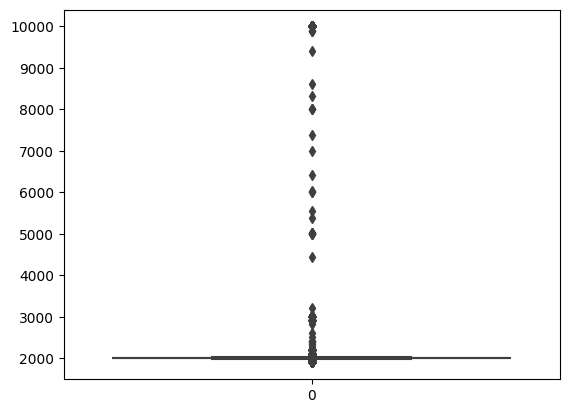

In [7]:
ind = v_data[(v_data['NUM_PASSENGERS'] > 8)].index.tolist()
print(len(ind))
v_data.drop(ind, inplace = True)
v_data = v_data.astype({'LIC_PLATE_STATE':'str'})
sns.boxplot(vehicle_data['VEHICLE_YEAR'])

937
325


<Axes: >

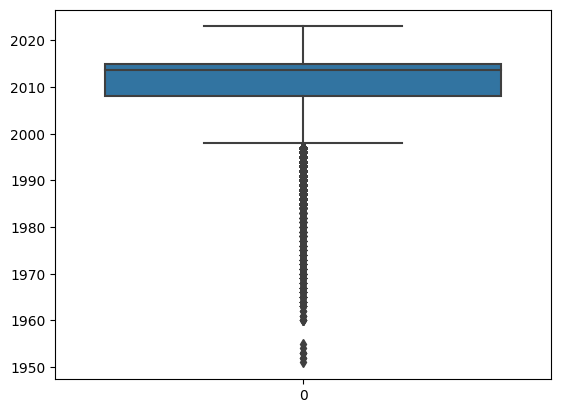

In [8]:
ind = v_data[(v_data['VEHICLE_YEAR'] > 2023)].index.tolist()
print(len(ind))
v_data.drop(ind, inplace = True)
ind = v_data[(v_data['VEHICLE_YEAR'] < 1950)].index.tolist()
print(len(ind))
v_data.drop(ind, inplace = True)
sns.boxplot(v_data['VEHICLE_YEAR'])

47521


<Axes: >

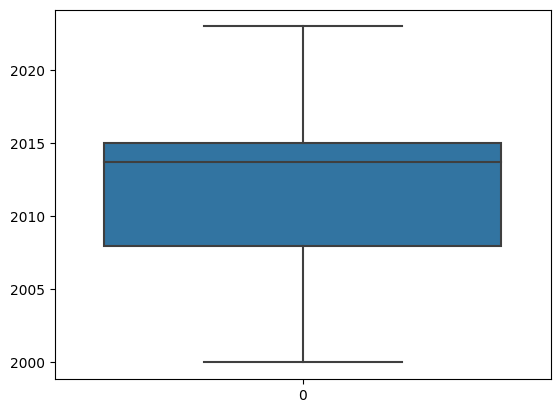

In [9]:
ind = v_data[(v_data['VEHICLE_YEAR'] < 2000)].index.tolist()
print(len(ind))
v_data.drop(ind, inplace = True)
sns.boxplot(v_data['VEHICLE_YEAR'])

In [10]:
v_data.shape[0]

1341239

# Exploratory Data Analysis - Team Member 1
The datatype of each column is mentioned below and visualization is done for two different scenarios
1) Year of vehicle manufactured involved in a crash
2) Type of vehicle involved in a crash

CRASH_RECORD_ID      object
CRASH_DATE           object
UNIT_TYPE            object
NUM_PASSENGERS        int32
VEHICLE_ID          float64
MAKE                 object
LIC_PLATE_STATE      object
VEHICLE_YEAR          int32
VEHICLE_DEFECT       object
VEHICLE_USE          object
TRAVEL_DIRECTION     object
dtype: object


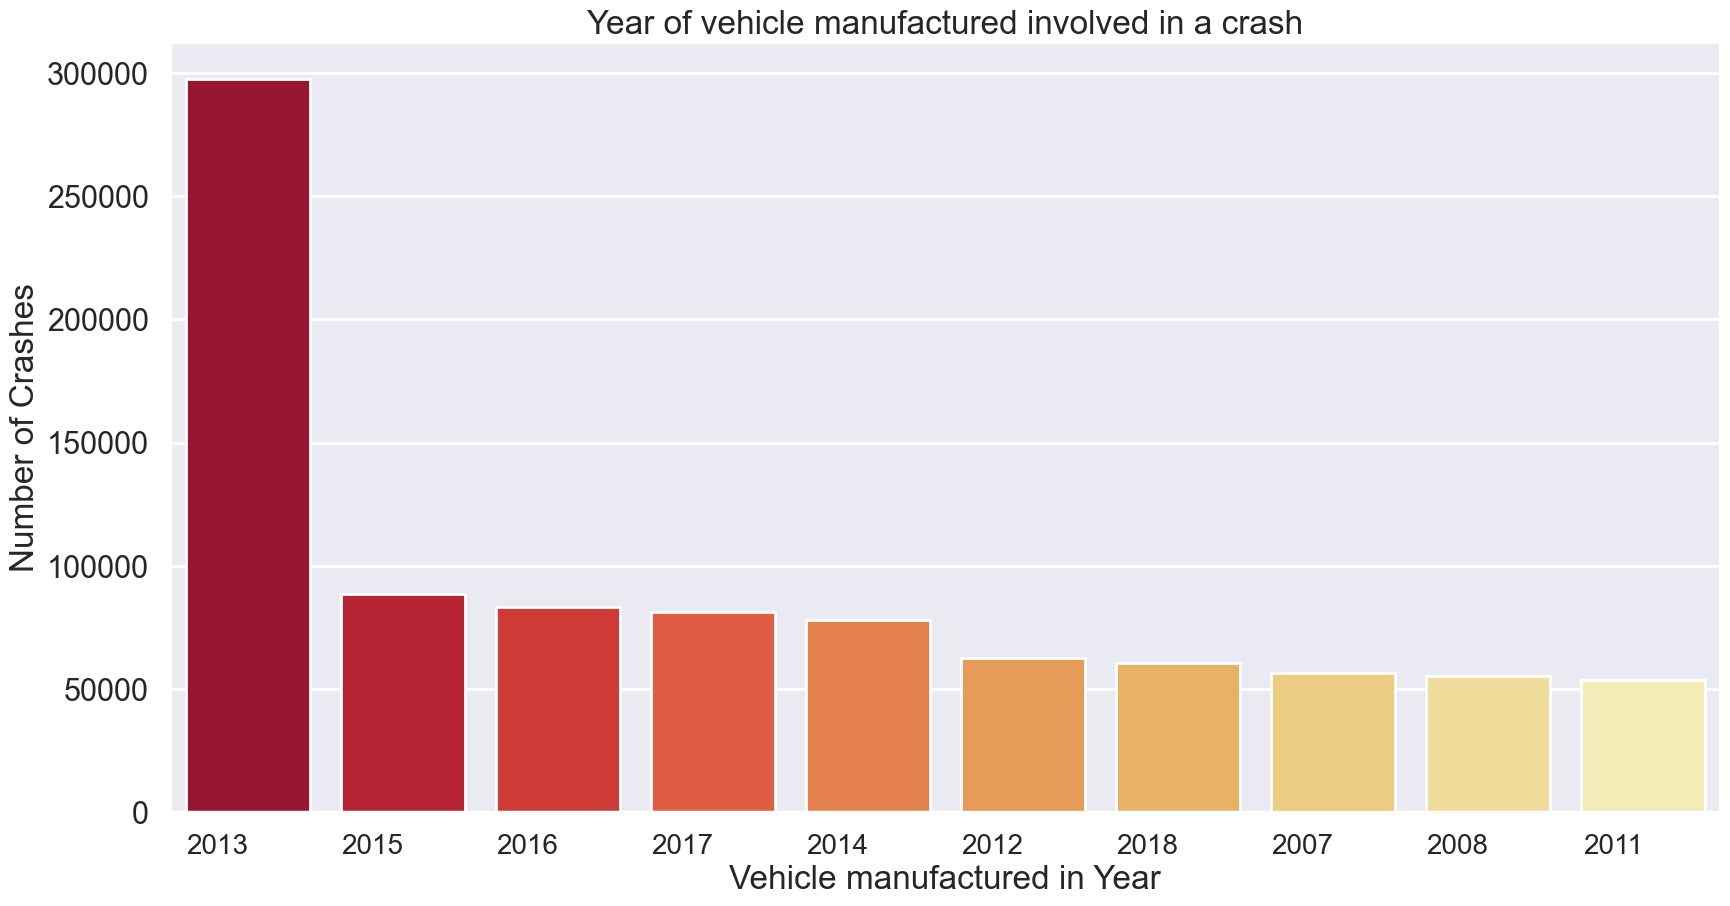

In [11]:
v_data = v_data.astype({'VEHICLE_YEAR':'int'})
print(v_data.dtypes)
sns.set_context("poster")
sns.set_style("darkgrid")
plt.figure(figsize =(20,10))
plt.xticks( 
    horizontalalignment='right',
    fontsize='small'  
)

ax = sns.countplot(x="VEHICLE_YEAR", data=v_data,order = v_data['VEHICLE_YEAR'].value_counts().head(10).index, palette = 'YlOrRd_r')
plt.xlabel('Vehicle manufactured in Year')
plt.ylabel('Number of Crashes')
plt.title('Year of vehicle manufactured involved in a crash')
plt.show()

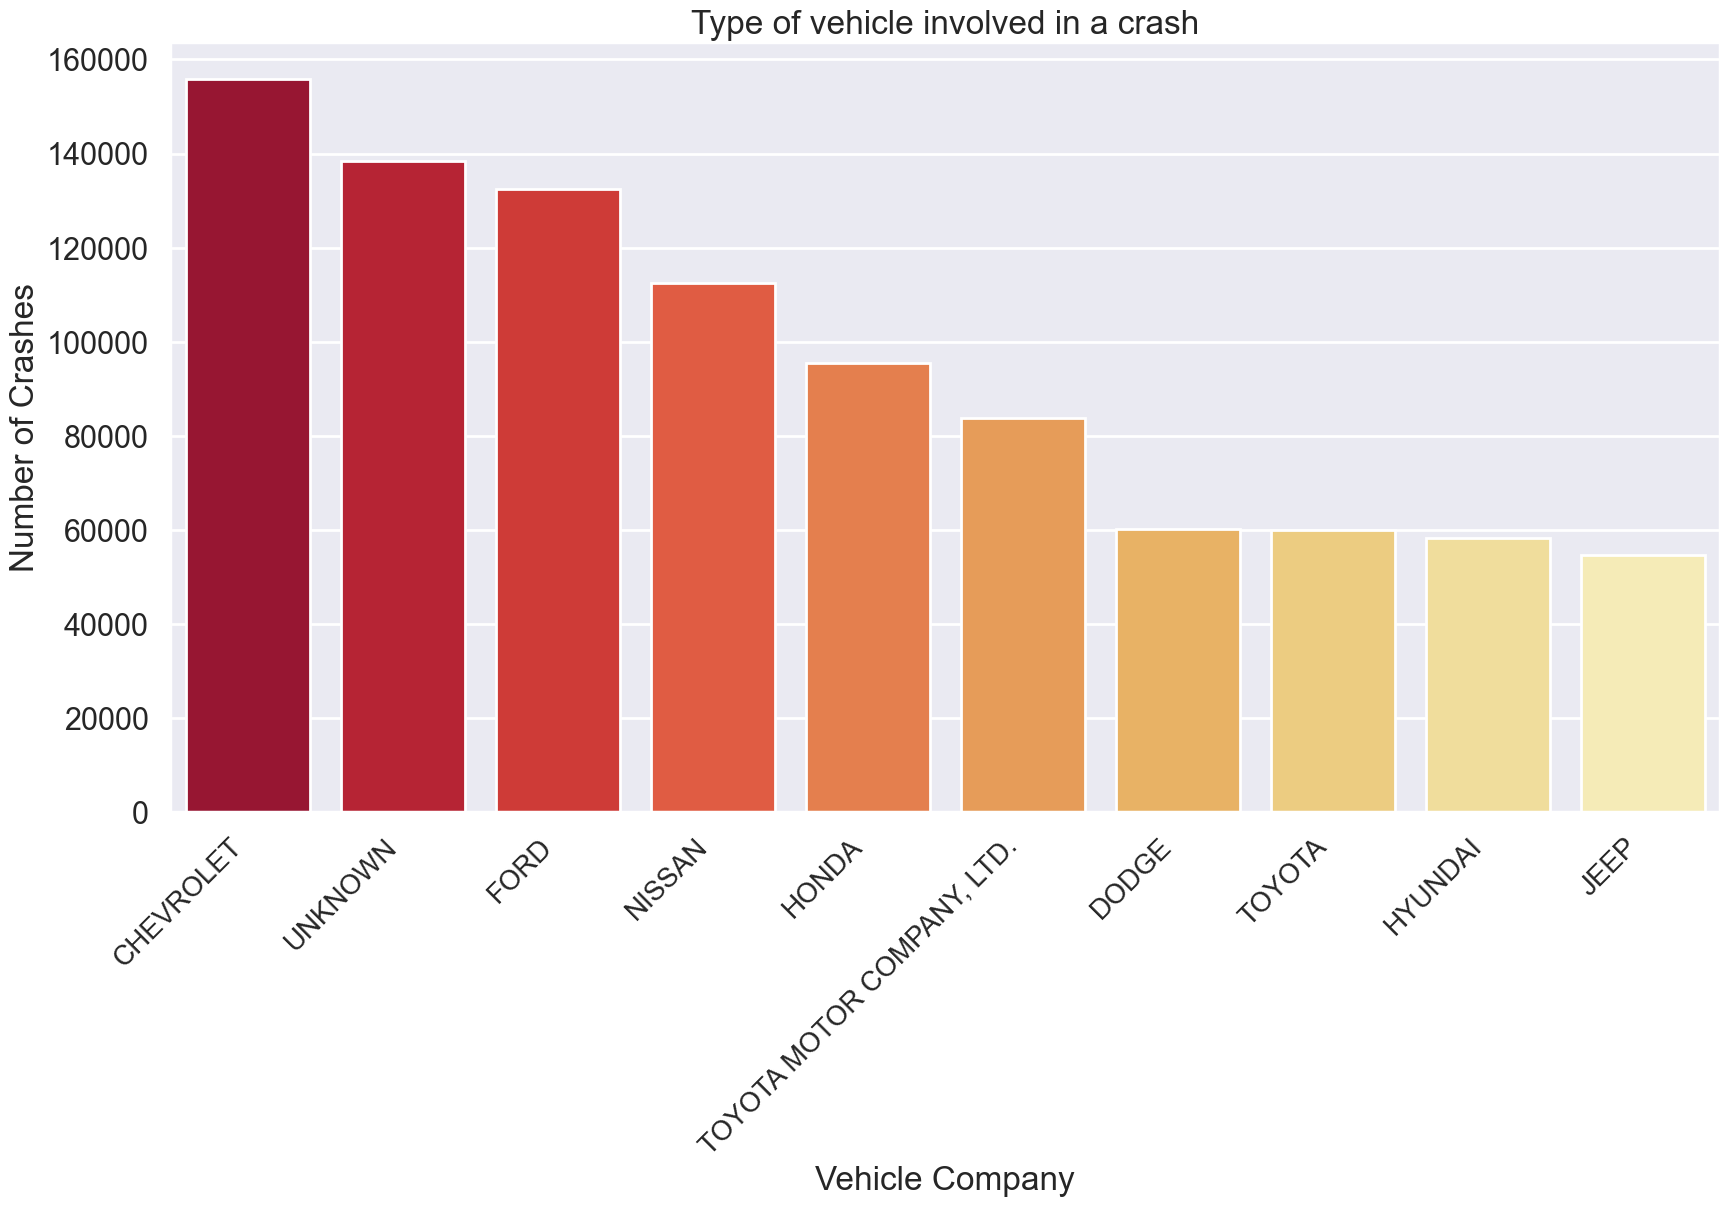

In [12]:
sns.set_context("poster")
sns.set_style("darkgrid")
plt.figure(figsize =(20,10))
plt.xticks( 
    rotation=45,
    horizontalalignment='right',
    fontsize='small'  
)

ax = sns.countplot(x="MAKE", data=v_data,order = v_data['MAKE'].value_counts().head(10).index, palette = 'YlOrRd_r')
plt.xlabel('Vehicle Company')
plt.ylabel('Number of Crashes')
plt.title('Type of vehicle involved in a crash')
plt.show()